# EpiRecipes Visualization Application

# Task 1: Data Cleaning and Preprocessing

In [3]:
# Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
# Loading the  Data
df_1 = pd.read_csv("epi_r.csv")
df_2 = pd.read_json("full_format_recipes.json")

In [5]:
# Shape of the data
print(df_1.shape,df_2.shape)

(20052, 680) (20130, 11)


* There are a total of 20052 records and 680 columns in df_1.
* There are a total of 20130 rows and 11 columns in df_2.

In [7]:
# Loading first 5 rows of data
print(df_1.head())

                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

   ...  yellow squash  yogurt  yonkers  yuca  zucc

In [8]:
print(df_2.head())

                                          directions   fat  \
0  [1. Place the stock, lentils, celery, carrot, ...   7.0   
1  [Combine first 9 ingredients in heavy medium s...  23.0   
2  [In a large heavy saucepan cook diced fennel a...   7.0   
3  [Heat oil in heavy large skillet over medium-h...   NaN   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...  32.0   

                       date  \
0 2006-09-01 04:00:00+00:00   
1 2004-08-20 04:00:00+00:00   
2 2004-08-20 04:00:00+00:00   
3 2009-03-27 04:00:00+00:00   
4 2004-08-20 04:00:00+00:00   

                                          categories  calories  \
0  [Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...     426.0   
1  [Food Processor, Onion, Pork, Bake, Bastille D...     403.0   
2  [Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...     165.0   
3  [Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...       NaN   
4  [Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...     547.0   

                                           

In [9]:
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB
None


In [10]:
df_3= df_2[["directions","categories","title","ingredients","date"]]

In [11]:
print(df_3.head())

                                          directions  \
0  [1. Place the stock, lentils, celery, carrot, ...   
1  [Combine first 9 ingredients in heavy medium s...   
2  [In a large heavy saucepan cook diced fennel a...   
3  [Heat oil in heavy large skillet over medium-h...   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...   

                                          categories  \
0  [Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...   
1  [Food Processor, Onion, Pork, Bake, Bastille D...   
2  [Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...   
3  [Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...   
4  [Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...   

                                         title  \
0              Lentil, Apple, and Turkey Wrap    
1  Boudin Blanc Terrine with Red Onion Confit    
2                Potato and Fennel Soup Hodge    
3             Mahi-Mahi in Tomato Olive Sauce    
4                    Spinach Noodle Casserole    

                         

In [12]:
# Drop null values from df_2[title]
df_3 = df_3.dropna(subset=["title"])

In [13]:
# Access the column containing lists
lists_column = df_3['ingredients']

# Get the length of each list
lengths = [len(lst) for lst in lists_column]

# Create a new column containing the lengths
df_3['ingredient_length'] = lengths

print(df_3.head())

                                          directions  \
0  [1. Place the stock, lentils, celery, carrot, ...   
1  [Combine first 9 ingredients in heavy medium s...   
2  [In a large heavy saucepan cook diced fennel a...   
3  [Heat oil in heavy large skillet over medium-h...   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...   

                                          categories  \
0  [Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...   
1  [Food Processor, Onion, Pork, Bake, Bastille D...   
2  [Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...   
3  [Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...   
4  [Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...   

                                         title  \
0              Lentil, Apple, and Turkey Wrap    
1  Boudin Blanc Terrine with Red Onion Confit    
2                Potato and Fennel Soup Hodge    
3             Mahi-Mahi in Tomato Olive Sauce    
4                    Spinach Noodle Casserole    

                         

In [14]:
# Function to extract time from the directions
def extract_times(directions):
    # Ensure directions is a string (join if it's a list)
    if isinstance(directions, list):
        directions = ' '.join(directions)  # Join list into a single string
    # Find all instances of time expressions in the format "X minutes" or "X hour"
    time_pattern = r'(\d+)\s*(minutes?|hours?)'
    times = re.findall(time_pattern, directions, flags=re.IGNORECASE)
    
    # Convert times to total minutes
    total_minutes = 0
    for amount, unit in times:
        amount = int(amount)
        if 'hour' in unit:
            total_minutes += amount * 60  # Convert hours to minutes
        else:
            total_minutes += amount  # Already in minutes
    
    return total_minutes

# Apply the function to extract cooking times from the directions
df_3['prep_time'] = df_3['directions'].apply(extract_times)

# Check the results
print(df_3[['directions', 'prep_time']].head(70))

                                           directions  prep_time
0   [1. Place the stock, lentils, celery, carrot, ...         30
1   [Combine first 9 ingredients in heavy medium s...        177
2   [In a large heavy saucepan cook diced fennel a...         40
3   [Heat oil in heavy large skillet over medium-h...         22
4   [Preheat oven to 350°F. Lightly grease 8x8x2-i...         55
..                                                ...        ...
65  [Preheat oven to 350°F. Butter three 9-inch-di...         38
66  [Grind the parsley, sage, rosemary, and thyme ...         31
67  [Combine the vinegar, garlic, mustard, and ore...          0
68  [Blend first 4 ingredients in processor until ...        540
69  [1 Heat the olive oil in a 3- or 4-quart sauce...         24

[70 rows x 2 columns]


In [15]:
# Extract year,month and day from date column
df_3["year"] = df_3["date"].dt.year
df_3["month"] = df_3["date"].dt.month
df_3["day"] = df_3["date"].dt.day

In [16]:
# Merge the two dataframe on title(Inner Join).
df = pd.merge(df_1,df_3[["title","ingredient_length","prep_time","day","month","year"]],on="title",how = "inner")

In [17]:
print(df.head())

                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

   ...  cookbooks  leftovers  snack  snack week  t

In [18]:
# Shape of Dataframe after merge.
df.shape

(27941, 685)

In [19]:
# Total Duplicate records
print(df.duplicated().sum())

8191


In [20]:
# Drop duplicate records
df = df.drop_duplicates()
print(df.shape)

(19750, 685)


In [21]:
# Checking for null values
for i in df.columns:
    print(i,df[i].isnull().sum())

title 0
rating 0
calories 3898
protein 3996
fat 4021
sodium 3900
#cakeweek 0
#wasteless 0
22-minute meals 0
3-ingredient recipes 0
30 days of groceries 0
advance prep required 0
alabama 0
alaska 0
alcoholic 0
almond 0
amaretto 0
anchovy 0
anise 0
anniversary 0
anthony bourdain 0
aperitif 0
appetizer 0
apple 0
apple juice 0
apricot 0
arizona 0
artichoke 0
arugula 0
asian pear 0
asparagus 0
aspen 0
atlanta 0
australia 0
avocado 0
back to school 0
backyard bbq 0
bacon 0
bake 0
banana 0
barley 0
basil 0
bass 0
bastille day 0
bean 0
beef 0
beef rib 0
beef shank 0
beef tenderloin 0
beer 0
beet 0
bell pepper 0
berry 0
beverly hills 0
birthday 0
biscuit 0
bitters 0
blackberry 0
blender 0
blue cheese 0
blueberry 0
boil 0
bok choy 0
bon appétit 0
bon app��tit 0
boston 0
bourbon 0
braise 0
bran 0
brandy 0
bread 0
breadcrumbs 0
breakfast 0
brie 0
brine 0
brisket 0
broccoli 0
broccoli rabe 0
broil 0
brooklyn 0
brown rice 0
brownie 0
brunch 0
brussel sprout 0
buffalo 0
buffet 0
bulgaria 0
bulgur 0
b

#### Observations:
* There are missing values in calories,protein,fat and sodium columns.
* We will impute the missing values by mean or meadian of the column.

In [23]:
# Imputing missing values with mean
df["calories"] = df["calories"].fillna(df["calories"].mean())
df["protein"] = df["protein"].fillna(df["protein"].mean())
df["fat"] = df["fat"].fillna(df["fat"].mean())
df["sodium"] = df["sodium"].fillna(df["sodium"].mean())

# Task 2: Exploratory Data Analysis (EDA)

In [25]:
# Describe the DataFrame
print(df.describe())

             rating      calories        protein           fat        sodium  \
count  19750.000000  1.975000e+04   19750.000000  1.975000e+04  1.975000e+04   
mean       3.696646  6.086286e+03      85.646502  3.352954e+02  6.047442e+03   
std        1.366942  3.211518e+05    3005.965787  1.826861e+04  2.985503e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  2.270000e+02       4.000000  1.000000e+01  1.200000e+02   
50%        4.375000  4.380000e+02      15.000000  2.400000e+01  4.510000e+02   
75%        4.375000  1.154750e+03      68.000000  7.800000e+01  1.736750e+03   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  19750.000000  19750.000000     19750.000000          19750.000000   
mean       0.000304      0.000051         0.000861              0.001367   
std        0.017428      0.007116         0.029327 

#### Observations
* We can observe that there is a huge difference between the 75% and Max value of calories,protein,fat,sodium,ingredient length and prep time.This is caused due to extreme values.

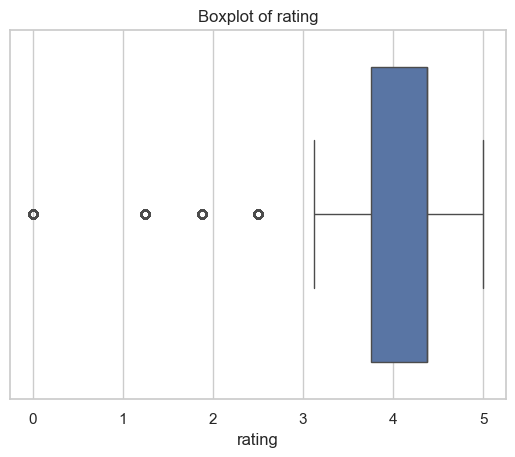

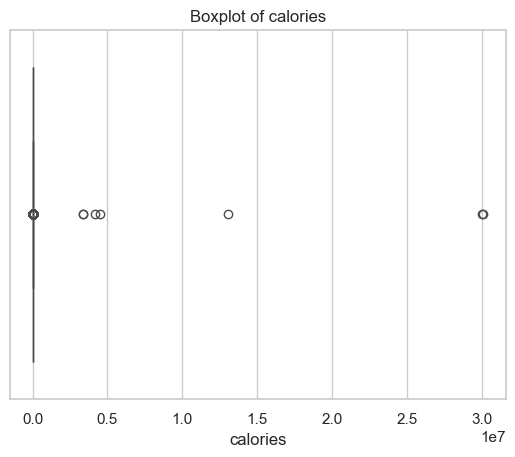

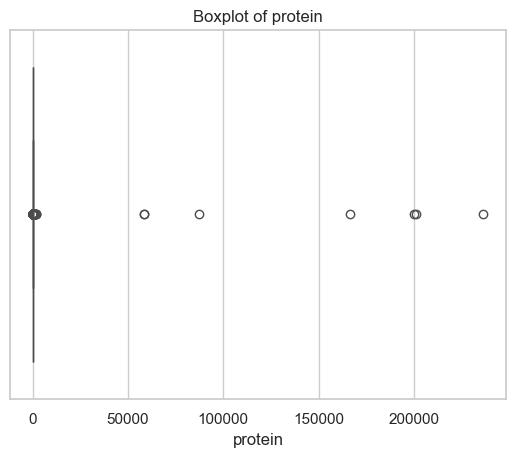

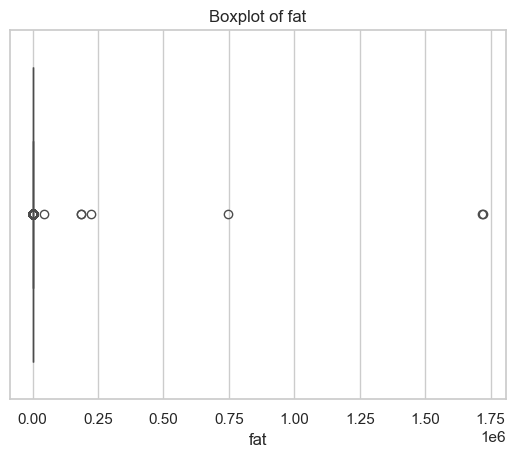

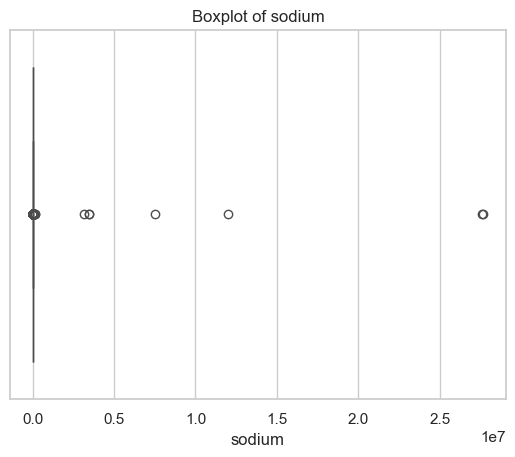

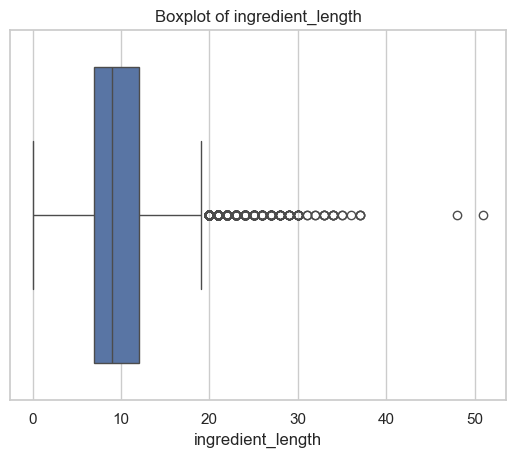

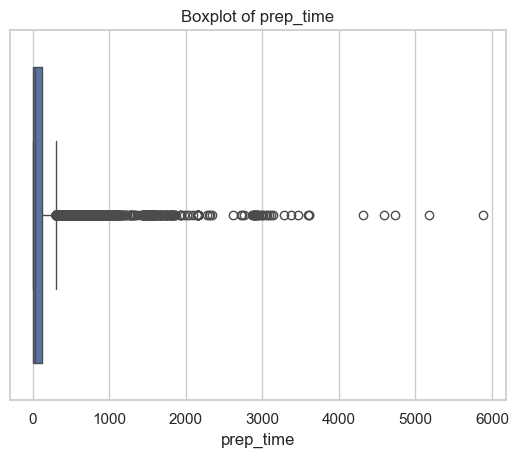

In [27]:
# Create a boxplot for columns to determine outliers
columns_to_check = ["rating","calories","protein","fat","sodium","ingredient_length","prep_time"]
sns.set_theme(style="whitegrid")
for col in columns_to_check:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

#### Observations:
* From the above boxplots, we can find there are several outliers in the data.
* We will replace this outliers by their 25 percentile if it is lower than lower bound and by 75 percentile if it is above higher bound using IQR Method.

In [29]:
# Outlier treatment for columns
for col in columns_to_check:
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col][(df[col] > upper_bound)] = upper_bound

C:\Users\HP\AppData\Local\Temp\ipykernel_11932\3474085381.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][(df[col] > upper_bound)] = upper_bound
C:\Users\HP\AppData\Local\Temp\ipykernel_11932\3474085381.py:7: SettingWithCopyWarni

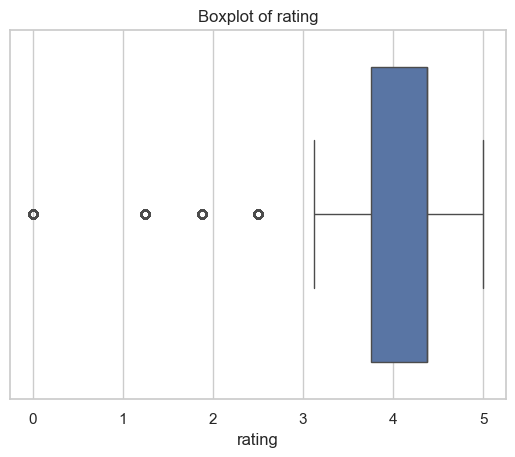

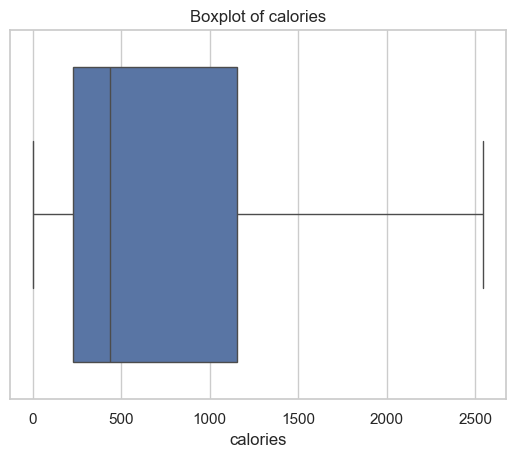

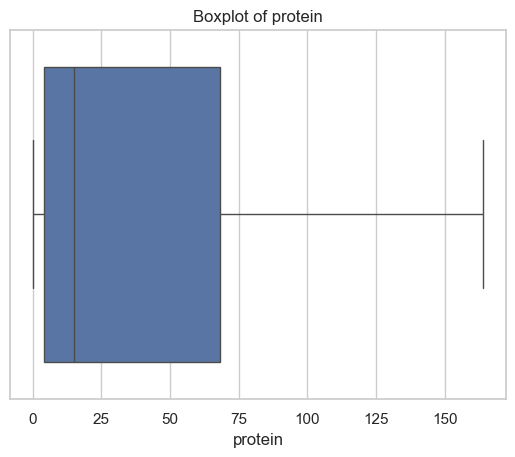

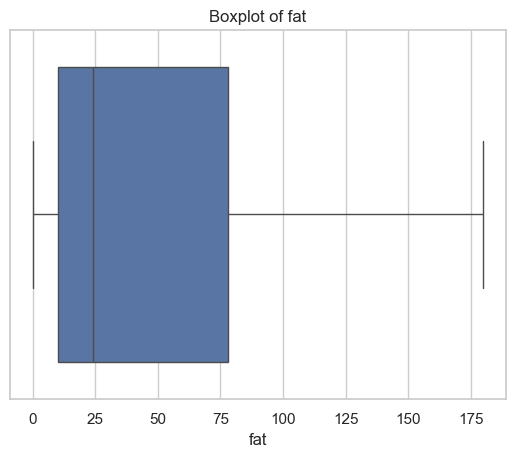

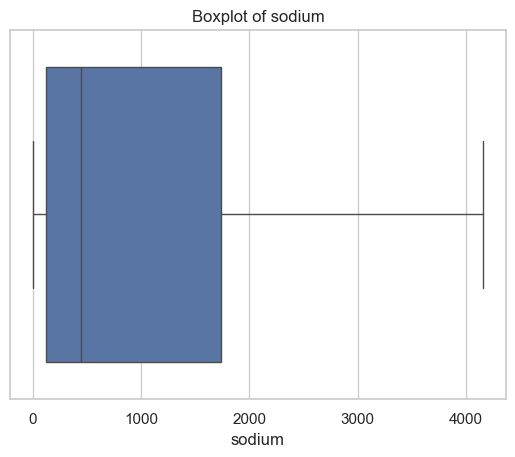

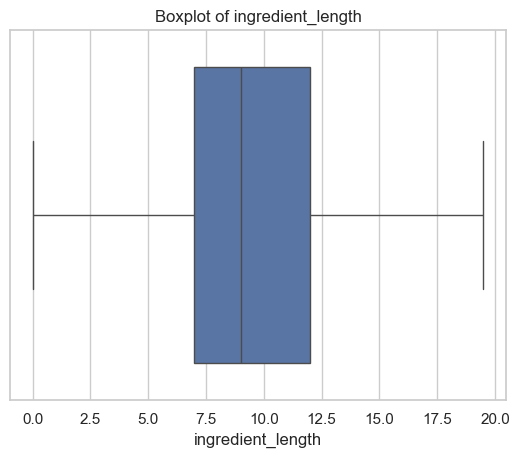

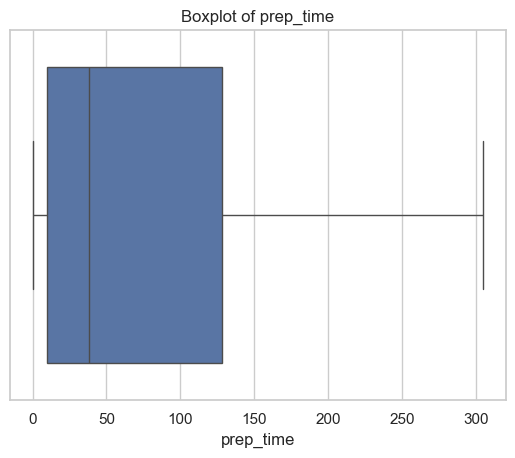

In [30]:
# Create a boxplot for each column
for col in columns_to_check:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [31]:
print(df.describe())

             rating      calories       protein           fat        sodium  \
count  19750.000000  19750.000000  19750.000000  19750.000000  19750.000000   
mean       3.696646    876.164544     33.203110     57.672911   1263.623196   
std        1.366942    918.332459     36.406507     67.774205   1588.120722   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.750000    227.000000      4.000000     10.000000    120.000000   
50%        4.375000    438.000000     15.000000     24.000000    451.000000   
75%        4.375000   1154.750000     68.000000     78.000000   1736.750000   
max        5.000000   2546.375000    164.000000    180.000000   4161.875000   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  19750.000000  19750.000000     19750.000000          19750.000000   
mean       0.000304      0.000051         0.000861              0.001367   
std        0.017428      0.007116         0.029327          

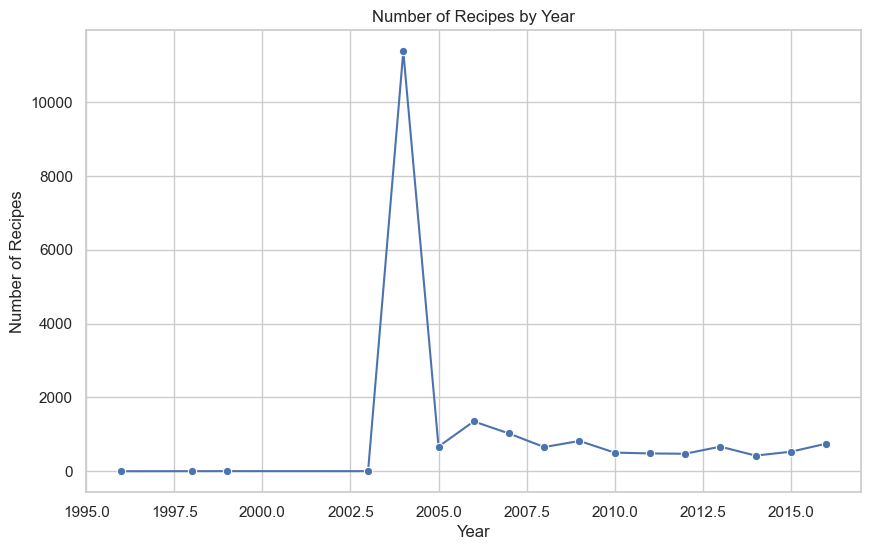

In [32]:
# Count the number of recipes per year
recipes_per_year = df.groupby('year').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=recipes_per_year.index, y=recipes_per_year.values, marker='o', color='b')
plt.title('Number of Recipes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Recipes')
plt.grid(True)
plt.show()

#### Observations:
* Maximum recipe is published betweem 2002 to 2005.

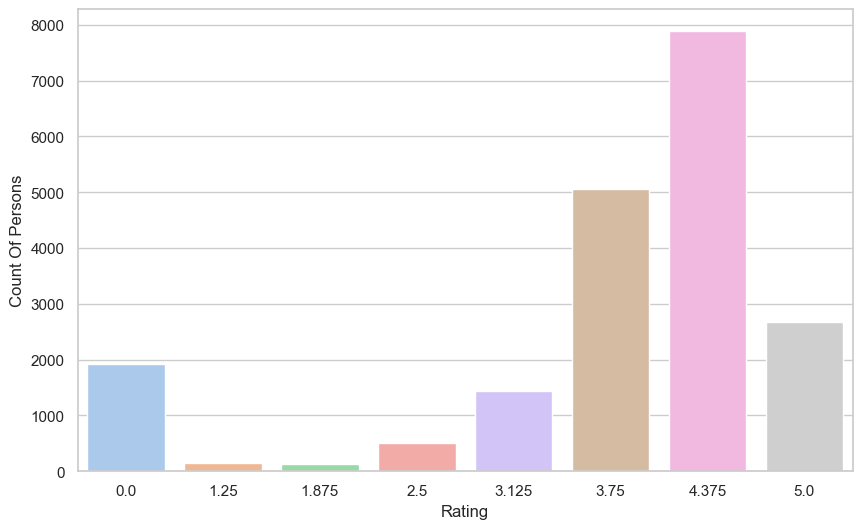

In [34]:
# Countplot for Rating Columns
plt.figure(figsize=(10, 6))
sns.countplot(x= "rating",data = df,palette='pastel',hue = "rating",legend = False)
plt.xlabel("Rating")
plt.ylabel("Count Of Persons")
plt.show()

#### Observations:
* This plot shows that maximum person gave a rating of 4.375, followed by 3.75 and 5.0 .

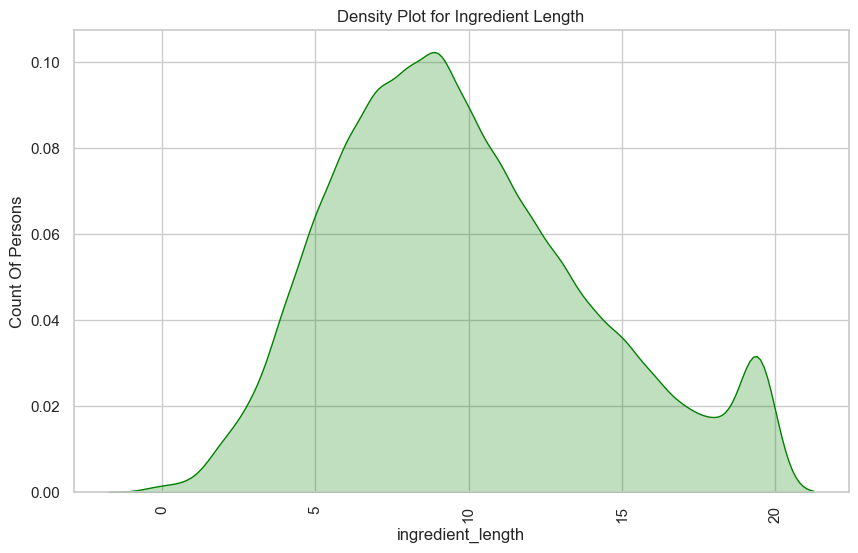

In [36]:
# Density Plot for Ingredient Length
plt.figure(figsize=(10,6))
sns.kdeplot(x= "ingredient_length",data = df,fill = True, color='green')
plt.xlabel("ingredient_length")
plt.title('Density Plot for Ingredient Length')
plt.ylabel("Count Of Persons")
plt.tick_params(axis='x', rotation=90)
plt.show()

#### Observations:
* This is a density plot for ingredient length.
* The plot is normally distributed but shows a little spike at the end.

<Figure size 1000x600 with 0 Axes>

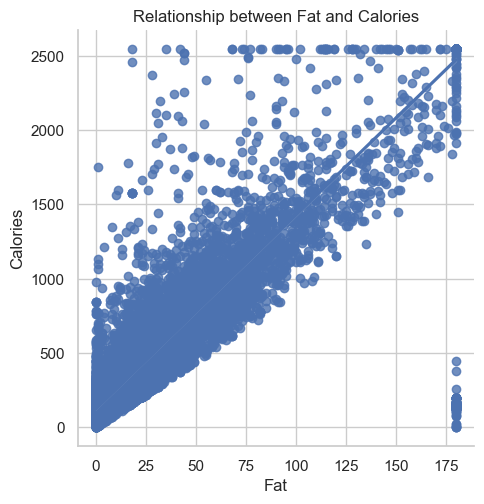

In [38]:
# Scatter Plot for Calories and Fat
plt.figure(figsize=(10, 6))
sns.lmplot(x="fat", y="calories", data=df)
plt.xlabel("Fat")
plt.ylabel("Calories")
plt.title("Relationship between Fat and Calories")
plt.show()

#### Observations:
* This is a scatter plot showing relation between Calories and Fat.
* This graph shows a linear relation between Calories and Protein.

<Figure size 1000x600 with 0 Axes>

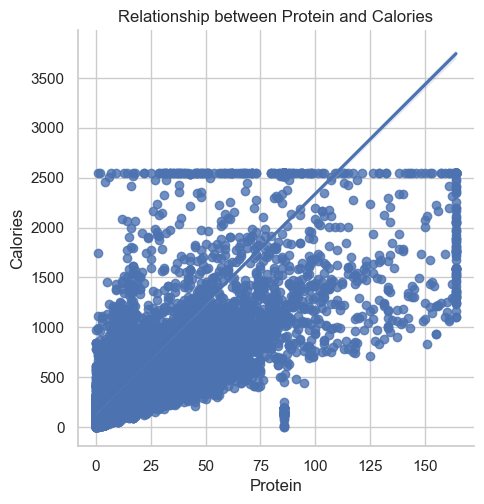

In [40]:
# Relationship between Protein and Calories 
plt.figure(figsize=(10, 6))
sns.lmplot(x="protein", y="calories", data=df)
plt.xlabel("Protein")
plt.ylabel("Calories")
plt.title("Relationship between Protein and Calories")
plt.show()

<Figure size 1000x600 with 0 Axes>

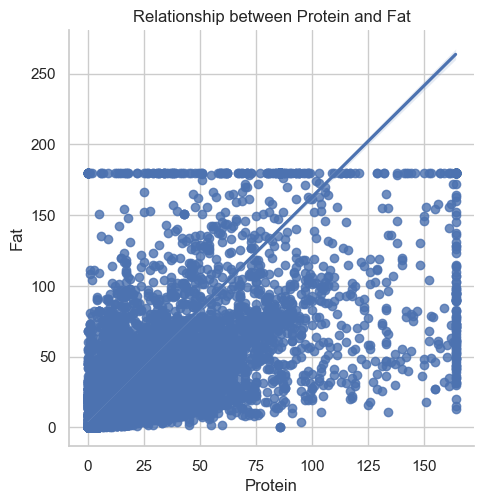

In [41]:
# Relationship between Protein and Fat 
plt.figure(figsize=(10, 6))
sns.lmplot(x="protein", y="fat", data=df)
plt.xlabel("Protein")
plt.ylabel("Fat")
plt.title("Relationship between Protein and Fat")
plt.show()

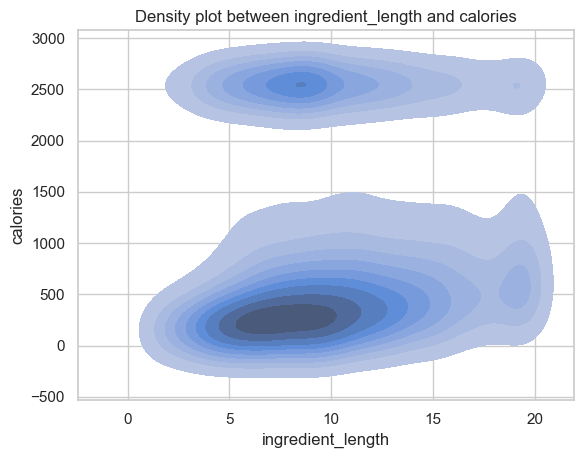

In [42]:
# Relationship between Ingredient length and Calories 
sns.kdeplot(x="ingredient_length", y="calories", data=df,fill = True)
plt.xlabel("ingredient_length")
plt.ylabel("calories")
plt.title("Density plot between ingredient_length and calories")
plt.show()

#### Observations:
* This is a density plot between Calories and Ingredient Length.
* We can observe that when the number of ingredients is 5 to 10, calorie content is around 0 to 500.

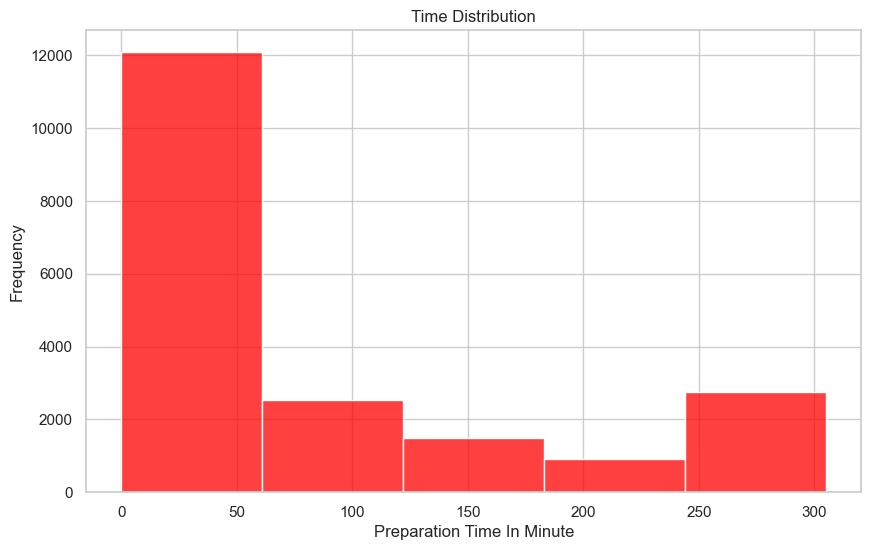

In [44]:
# Distribution Of Preparation Time
plt.figure(figsize=(10, 6))
sns.histplot(x="prep_time", data=df, bins = 5,color = "red")
plt.xlabel("Preparation Time In Minute")
plt.ylabel("Frequency")
plt.title("Time Distribution")
plt.show()

#### Observations:
* This is a Frequency distribution table of Preparation time.
* We can observe that maximum recipe takes a time between 0 to 60 minute to prepare.

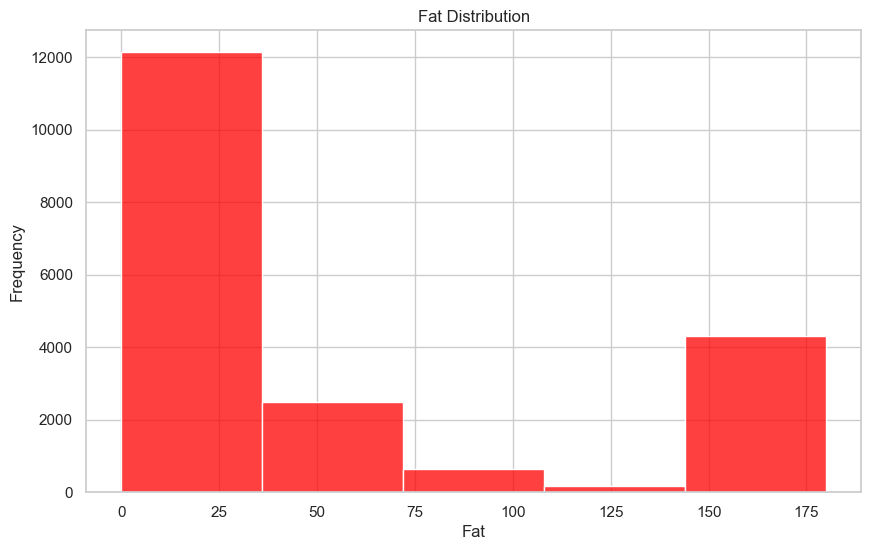

In [46]:
# # Distribution Of Fat
plt.figure(figsize=(10, 6))
sns.histplot(x="fat", data=df, bins = 5,color = "red")
plt.xlabel("Fat")
plt.ylabel("Frequency")
plt.title("Fat Distribution")
plt.show()

#### Observations:
* This is frequency distribution table of Fat.
* We can observe that most of the receipe contains a Fat contain Between 0 to 30.

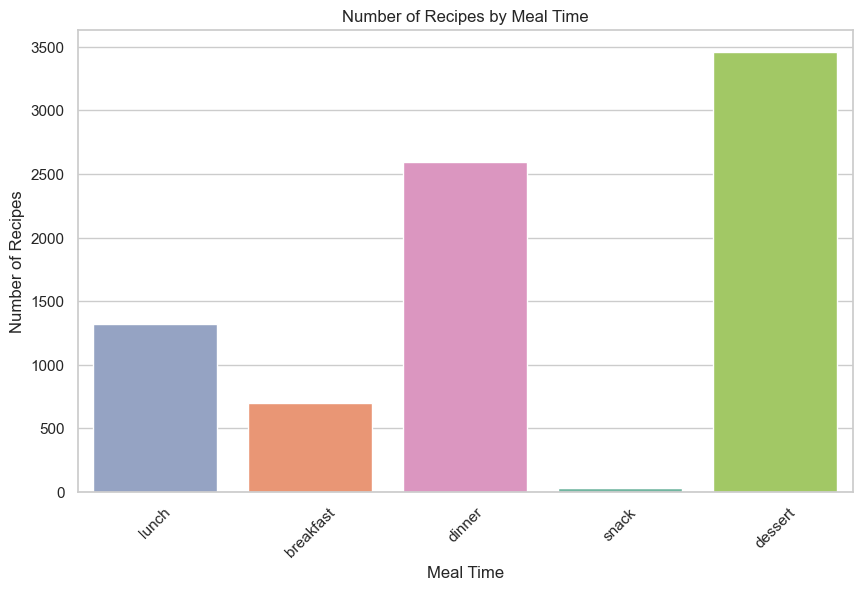

In [48]:
# Countplot for Meal Time
plt.figure(figsize=(10, 6))
meal_time = ["lunch","breakfast","dinner","snack","dessert"]
meal_counts = df[meal_time].sum()
sns.barplot(x=meal_counts.index, y=meal_counts.values, palette='Set2',hue =meal_counts, legend = False )
plt.title('Number of Recipes by Meal Time')
plt.xlabel('Meal Time')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()

#### Observations:
* This is bar plot Of Number of receipes per Meal Time.
* We observe that most of the Recipe are for desserts,followed by dinner and lunch.

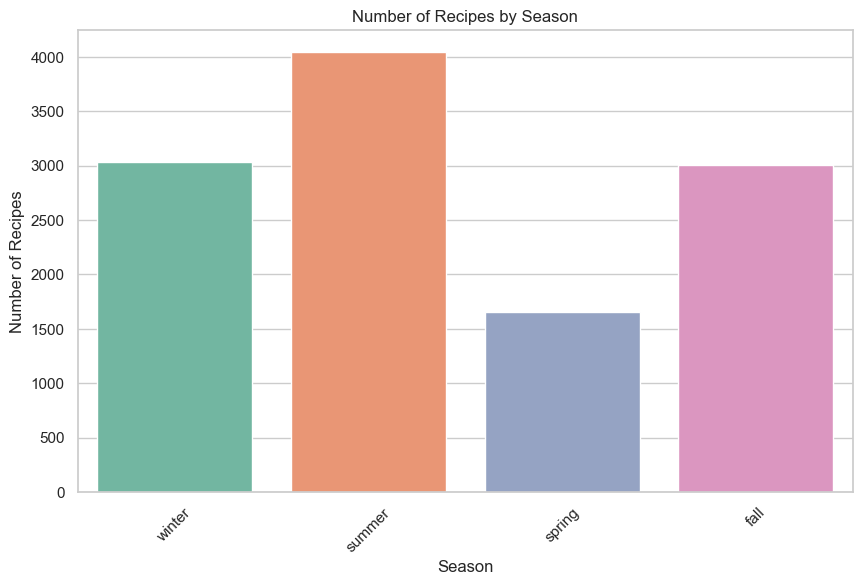

In [50]:
# Countplot for Season
plt.figure(figsize=(10, 6))
season = ["winter","summer","spring","fall"]
season_counts = df[season].sum()
sns.barplot(x=season_counts.index, y=season_counts.values, hue=season_counts.index,palette='Set2', legend = False )
plt.title('Number of Recipes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()

#### Observations:
* This is a bar plot for number of recipe per season.
* We can observe that most of the recipe are cooked during Summer, winter and Fall.

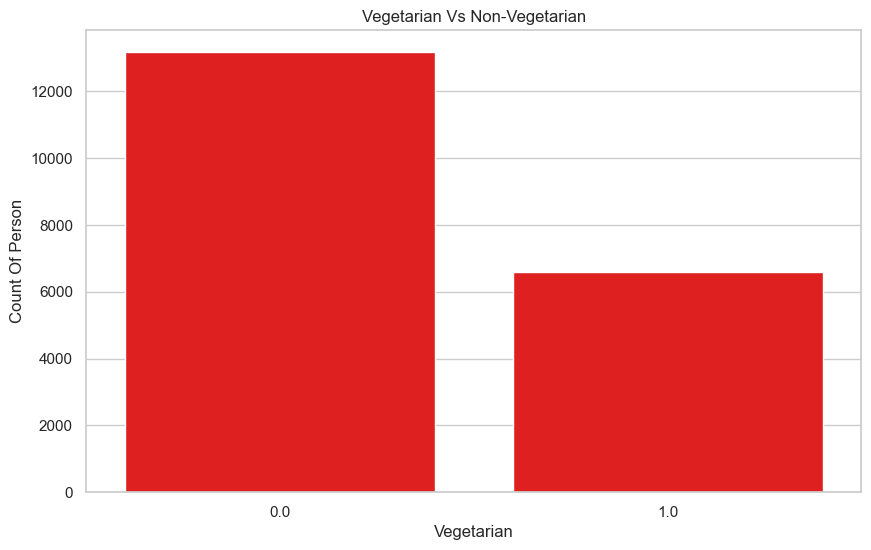

In [52]:
# Count plot for Vegetarian and Non Vegetarian
plt.figure(figsize=(10, 6))
sns.countplot(x=df["vegetarian"],color = "red")
plt.xlabel("Vegetarian")
plt.ylabel("Count Of Person")
plt.title('Vegetarian Vs Non-Vegetarian')
plt.show()

#### Observations:
* This is a countplot for vegetarian and Non-vegetarian.
* We can observe that most of the persons are Non-vegetarian.

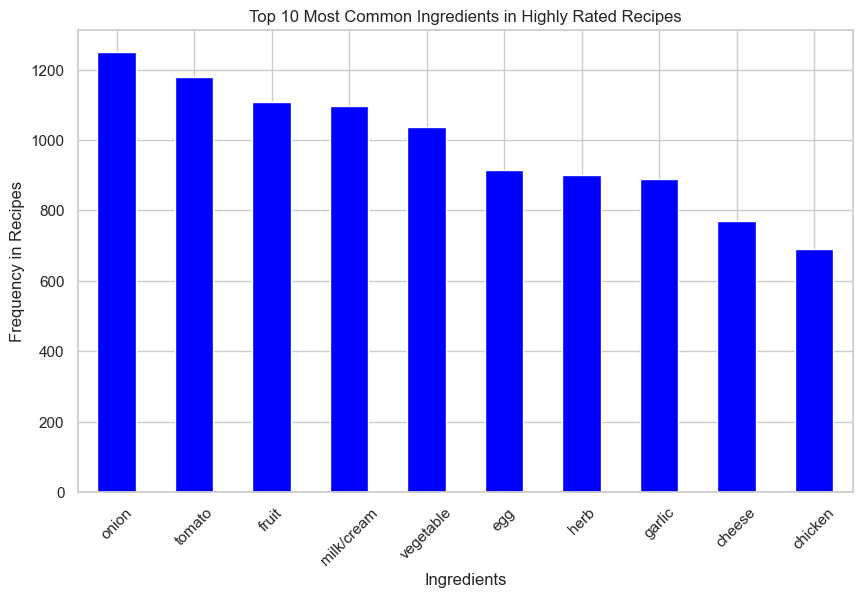

In [54]:
# List of ingredient columns (assuming they are all ingredient columns)
ingredient_columns = [
    'butter', 'tomato', 'garlic', 'onion', 'olive', 'chicken', 'egg', 
    'milk/cream', 'herb', 'fruit', 'sauce', 'spice', 'bread', 'cheese', 'bacon', 'basil', 
    'almond', 'bean', 'pepper', 'apple', 'cake', 'mustard', 'mint', 'parsley', 'vinegar', 
    'shrimp', 'walnut', 'cranberry', 'potato', 'fish', 'turkey', 'carrot', 'beef', 'mushroom',
    'pork', 'pasta', 'lemon', 'ginger', 'lime', 'chocolate', 'nut', 'parmesan', 'cream cheese',
    'celery', 'cilantro', 'eggplant', 'rice', 'broccoli', 'spinach','vegetable'
]
# Filter highly rated recipes (e.g., rating >= 4)
highly_rated_recipes = df[df['rating'] >= 4]

# Sum the values for each ingredient in highly rated recipes
ingredient_sums = highly_rated_recipes[ingredient_columns].sum()

# Sort the ingredients by their frequency in descending order
sorted_ingredients = ingredient_sums.sort_values(ascending=False)

# Get the top 10 most common ingredients
top_10_ingredients = sorted_ingredients.head(10)

# Plot a bar chart for the top 10 most common ingredients
plt.figure(figsize=(10, 6))
top_10_ingredients.plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Ingredients in Highly Rated Recipes')
plt.xlabel('Ingredients')
plt.ylabel('Frequency in Recipes')
plt.xticks(rotation=45)
plt.show()

#### Observations:
* This is a bar graph of Top 10 Most Common Ingredients in Highly Rated Recipes.
* We can observe that onion,tomato,fruits are some commom inggredient in the top rated recipe.

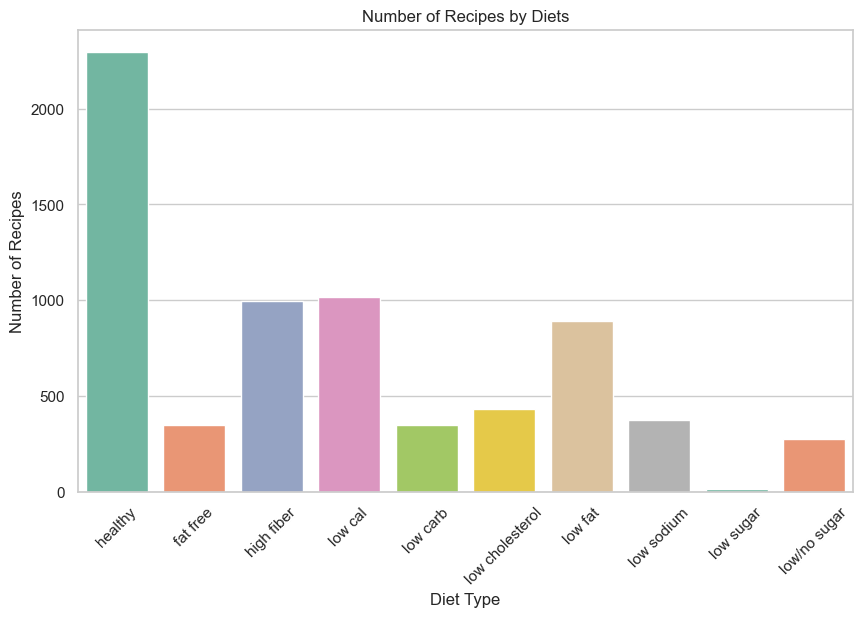

In [56]:
# Plot a bar chart for Number of Recipes by Diets
diet_type = ['healthy','fat free','high fiber','low cal','low carb','low cholesterol','low fat','low sodium','low sugar','low/no sugar']
diet_counts = df[diet_type].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=diet_counts.index, y=diet_counts.values, hue=diet_counts.index,palette='Set2', legend = False )
plt.title('Number of Recipes by Diets')
plt.xlabel('Diet Type')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()

#### Observations:
* Most of the recipe are considerd healthy, which is good for anyone considering following this data.

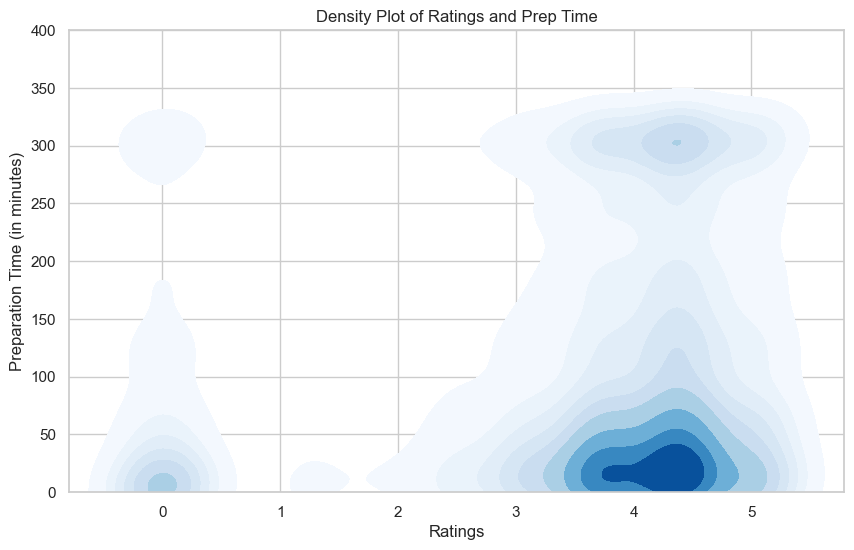

In [58]:
#Density Plot of Ratings and Prep Time
plt.figure(figsize=(10, 6))
sns.kdeplot(x='rating', y='prep_time', data=df, cmap='Blues', fill=True)
plt.title('Density Plot of Ratings and Prep Time')
plt.xlabel('Ratings')
plt.ylabel('Preparation Time (in minutes)')
plt.ylim([0, 400])
plt.show()

#### Observations:
* This is a density plot between Preparation Time and Rating.
* We can observe that top rated recipe takes less time to prepare.

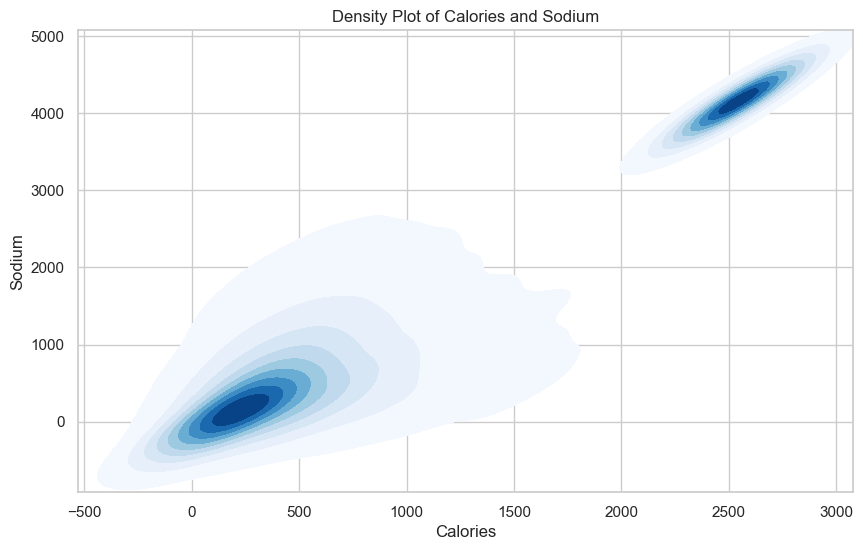

In [60]:
#Density Plot of Calories and Sodium
plt.figure(figsize=(10, 6))
sns.kdeplot(x='calories', y='sodium', data=df, cmap='Blues', fill=True)
plt.title('Density Plot of Calories and Sodium')
plt.xlabel('Calories')
plt.ylabel('Sodium')
plt.show()

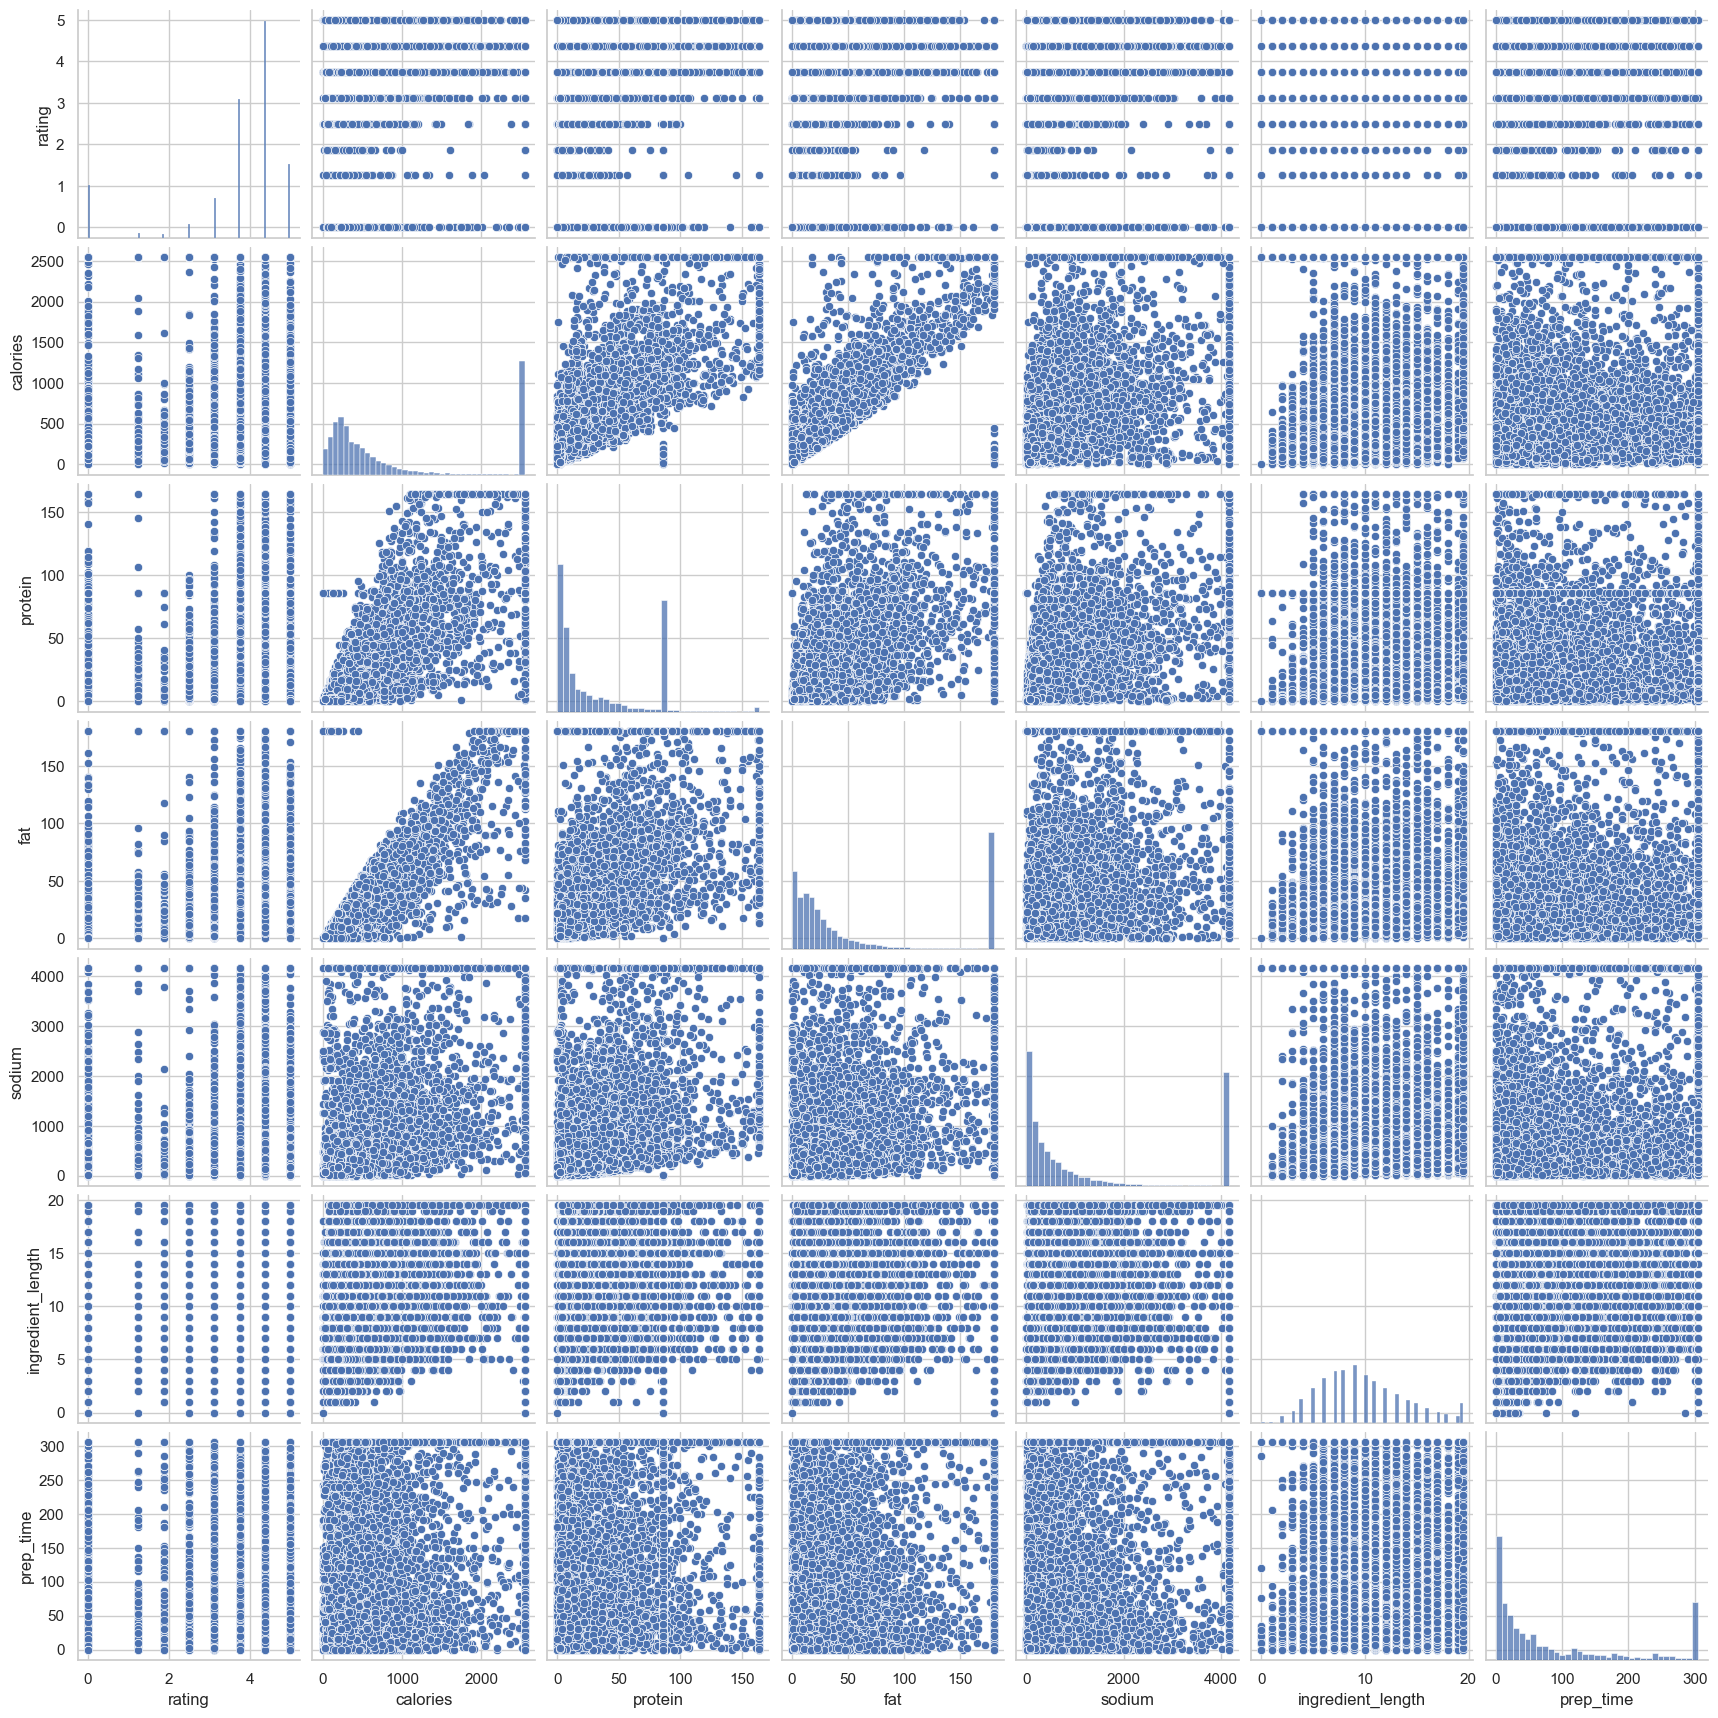

In [61]:
# Pairplot for a summary and more depth knowledge of Interested Columns Only.
sns.pairplot(df,vars=columns_to_check)
plt.show()

#### Observations:
* This is a pairplot between 7 columns.
* This shows summary and spread of data.

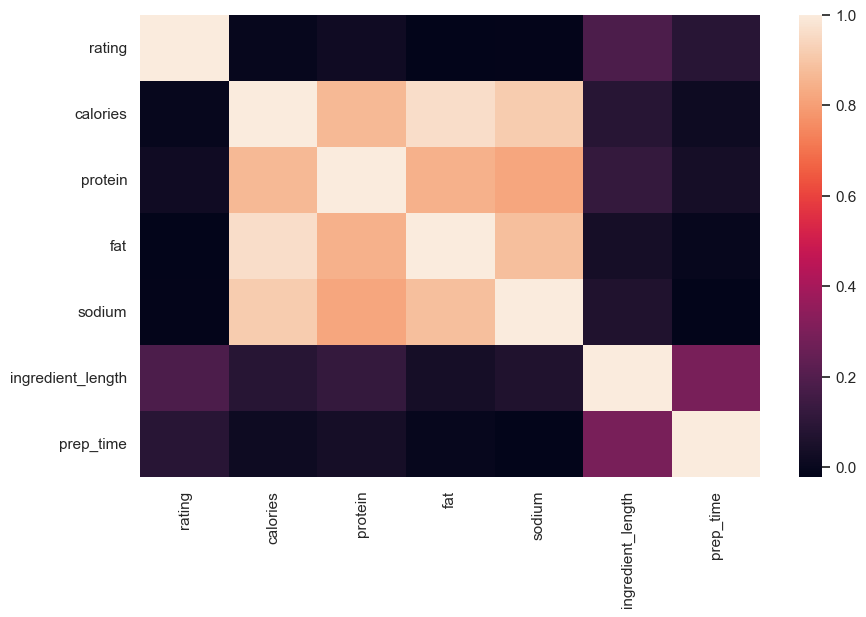

In [63]:
# Heatmap for finding correlation between the variables.
plt.figure(figsize=(10, 6))
sns.heatmap(df[columns_to_check].corr())
plt.show()

#### Observations:
* This is a heatmap which shows correlation between numerical columns.
* We can observe that calories,protein,fat and sodium are highly correlated with each other.